In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
data=pd.read_csv('forestfires.csv')

In [3]:
data.iloc[:,]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

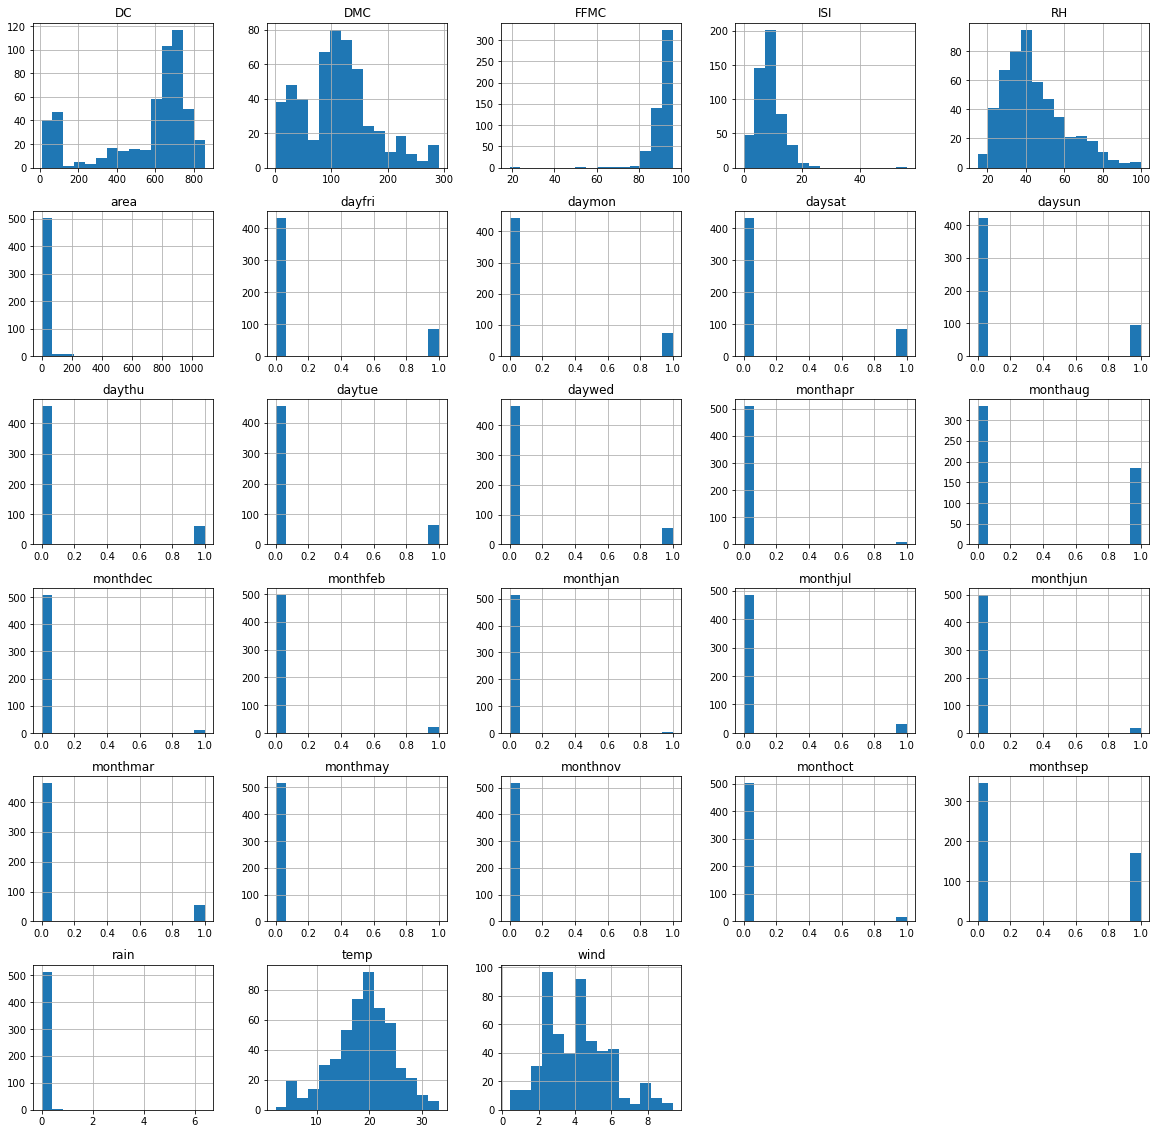

In [5]:
data.hist(bins=15,figsize=(20,20))
plt.show()

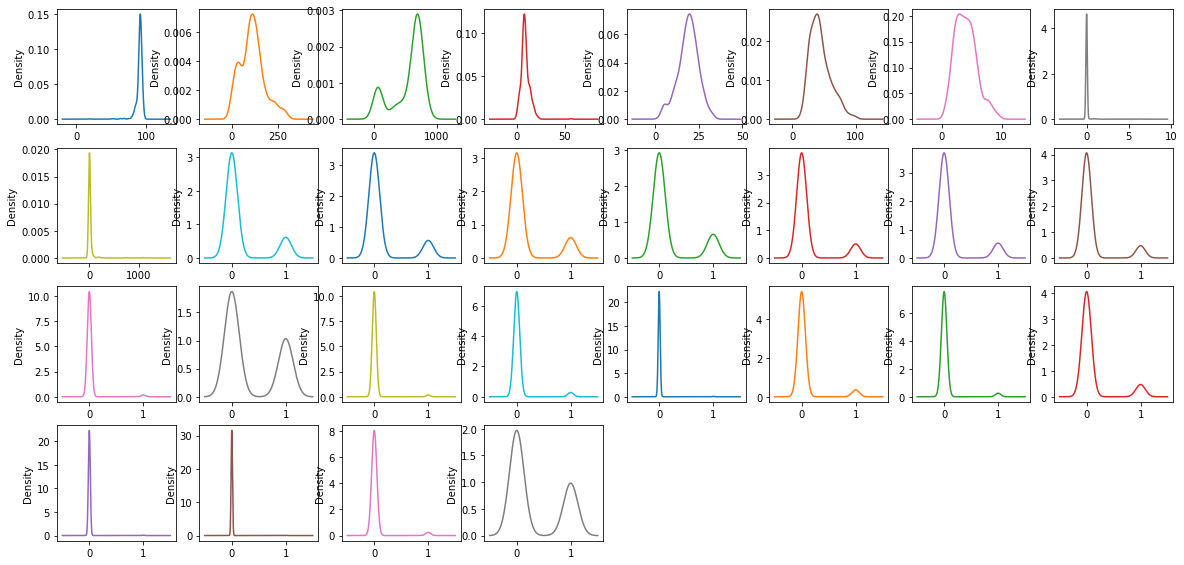

In [7]:
data.plot(kind='density',
         figsize=(20,20),
         subplots=True,
         layout=(8,8),
         sharex=False,
         legend=False)
plt.show()

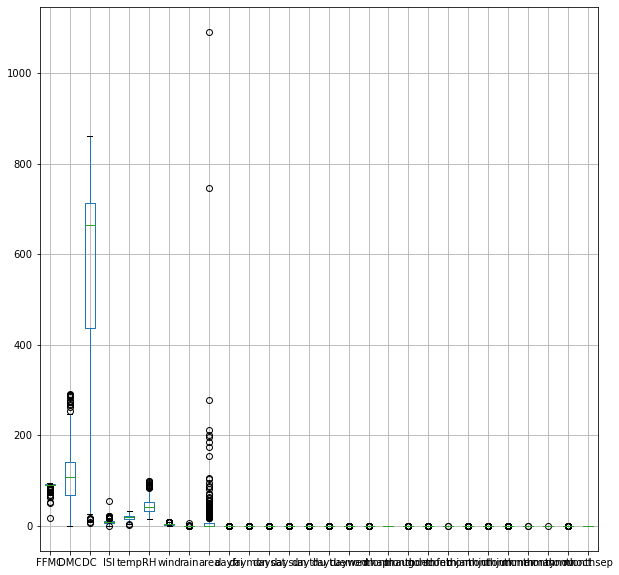

In [8]:
data.boxplot(figsize=(10,10))

In [9]:
transform=StandardScaler()
data.iloc[:,2:30]=transform.fit_transform(data.iloc[:,2:30])
data.iloc[:,30:31]=LabelEncoder().fit_transform(data.iloc[:,30:31])

C:\Users\MRITYUNJAY\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [10]:
X=np.array(data.iloc[:,2:30])
Y=np.array(data.iloc[:,30:31]).ravel()

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=230)

In [12]:
model=SVC()
parameter = [{'kernel':['rbf','poly'],'gamma':[100,50,10,0.5],'C':[10,0.1,15] }]
grid=GridSearchCV(model,parameter,cv=5,scoring='accuracy')
grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 15], 'gamma': [100, 50, 10, 0.5],
                          'kernel': ['rbf', 'poly']}],
             scoring='accuracy')

In [13]:
grid.best_params_,grid.best_score_

({'C': 0.1, 'gamma': 0.5, 'kernel': 'poly'}, 0.7700532724505328)

In [14]:
model1=SVC(gamma=0.5,C=0.1,kernel='poly')
results=cross_val_score(model1,X,Y,cv=KFold(n_splits=10))
print(results.mean())

0.742345399698341


In [15]:
model1.fit(X_train,Y_train)

SVC(C=0.1, gamma=0.5, kernel='poly')

In [16]:
Y_pred=model1.predict(X_test)

In [17]:
A=confusion_matrix(Y_pred,Y_test)
print(A)

[[21 16]
 [21 98]]


In [18]:
(A[0,0]+A[1,1])/A.sum()

0.7628205128205128